# 🛒 E-Commerce Analytics: Revenue, Retention, and Product Performance Analysis

## 💼 Business Problem Statement

An e-commerce company is experiencing inconsistent sales performance and customer churn across different regions and product categories.
The product team wants to understand key business drivers — such as revenue trends, top-performing products, customer retention, and regional growth — to make informed product and marketing decisions.

As a Product Analyst, your goal is to:

Analyze the company’s transactional data using SQL and Python.

Identify patterns in revenue, customer behavior, and churn.

Recommend data-driven strategies to improve retention, product focus, and overall sales performance.

__Libraries__

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


__Load dataset__

In [2]:
df = pd.read_csv("ecommerce_data.csv")
df.head()

,order_id,customer_id,order_date,delivery_date,delivery_days,region,product_category,payment_method,quantity,unit_price,discount,sales_amount,churn_status,rating,is_returned
0,ORD1000,CUST192,2023-04-12,2023-04-15,3,East,Sports,Net Banking,4,2058.67,0.28,5928.97,Retained,4,No
1,ORD1001,CUST356,2023-09-01,2023-09-02,1,West,Home Decor,Net Banking,3,1557.27,0.28,3363.70,Retained,5,Yes
2,ORD1002,CUST142,2023-07-17,2023-07-24,7,North,Beauty,Net Banking,1,1661.55,0.11,1478.78,Retained,3,No
3,ORD1003,CUST165,2023-02-08,2023-02-12,4,East,Electronics,Debit Card,1,4918.15,0.04,4721.42,Retained,2,No
4,ORD1004,CUST153,2023-01-27,2023-02-04,8,East,Beauty,Debit Card,2,3285.33,0.16,5519.35,Retained,4,No


__Data Cleaning__

In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          2000 non-null   object 
 1   customer_id       2000 non-null   object 
 2   order_date        2000 non-null   object 
 3   delivery_date     2000 non-null   object 
 4   delivery_days     2000 non-null   int64  
 5   region            2000 non-null   object 
 6   product_category  2000 non-null   object 
 7   payment_method    2000 non-null   object 
 8   quantity          2000 non-null   int64  
 9   unit_price        2000 non-null   float64
 10  discount          2000 non-null   float64
 11  sales_amount      2000 non-null   float64
 12  churn_status      2000 non-null   object 
 13  rating            2000 non-null   int64  
 14  is_returned       2000 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 234.5+ KB


order_id            0
customer_id         0
order_date          0
delivery_date       0
delivery_days       0
region              0
product_category    0
payment_method      0
quantity            0
unit_price          0
discount            0
sales_amount        0
churn_status        0
rating              0
is_returned         0
dtype: int64

__Convert Date Column__

In [5]:

df['order_date'] = pd.to_datetime(df['order_date'])
df['delivery_date'] = pd.to_datetime(df['delivery_date'])




__Basic checks__



In [6]:
df['region'].value_counts()
df['product_category'].value_counts()


product_category
Sports         418
Beauty         418
Electronics    395
Clothing       386
Home Decor     383
Name: count, dtype: int64

# Create in-memory SQLite DB

In [8]:
conn = sqlite3.connect(':memory:')
df.to_sql('orders', conn, index=False, if_exists='replace')

2000

__Example__

In [9]:
pd.read_sql_query("SELECT * FROM orders LIMIT 5;", conn)

,order_id,customer_id,order_date,delivery_date,delivery_days,region,product_category,payment_method,quantity,unit_price,discount,sales_amount,churn_status,rating,is_returned
0,ORD1000,CUST192,2023-04-12 00:00:00,2023-04-15 00:00:00,3,East,Sports,Net Banking,4,2058.67,0.28,5928.97,Retained,4,No
1,ORD1001,CUST356,2023-09-01 00:00:00,2023-09-02 00:00:00,1,West,Home Decor,Net Banking,3,1557.27,0.28,3363.70,Retained,5,Yes
2,ORD1002,CUST142,2023-07-17 00:00:00,2023-07-24 00:00:00,7,North,Beauty,Net Banking,1,1661.55,0.11,1478.78,Retained,3,No
3,ORD1003,CUST165,2023-02-08 00:00:00,2023-02-12 00:00:00,4,East,Electronics,Debit Card,1,4918.15,0.04,4721.42,Retained,2,No
4,ORD1004,CUST153,2023-01-27 00:00:00,2023-02-04 00:00:00,8,East,Beauty,Debit Card,2,3285.33,0.16,5519.35,Retained,4,No


# Revenue Analysis (KPIs)

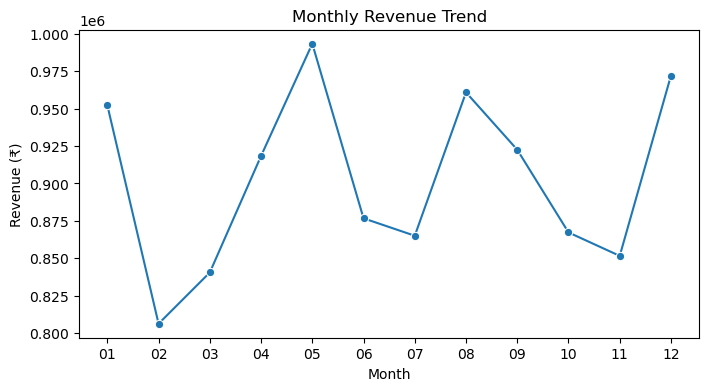

In [10]:
#Total Revenue Per Month
query = """
SELECT strftime('%m', order_date) AS month,
       SUM(sales_amount) AS total_revenue
FROM orders
GROUP BY month
ORDER BY month;
"""
revenue_monthly = pd.read_sql_query(query, conn)

plt.figure(figsize=(8,4))
sns.lineplot(data=revenue_monthly, x='month', y='total_revenue', marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue (₹)")
plt.show()

## Top Products / Categories

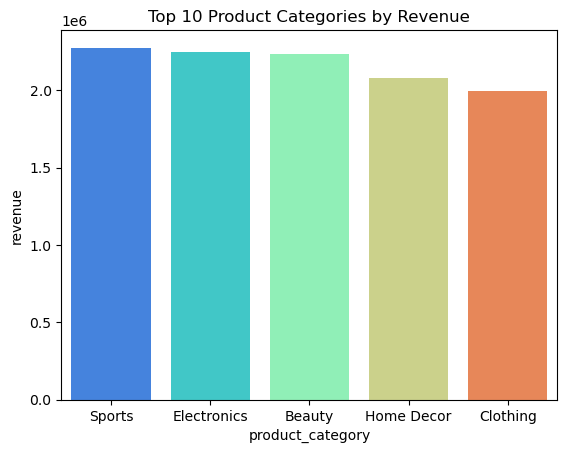

In [17]:
query = """
SELECT product_category, SUM(sales_amount) AS revenue
FROM orders
GROUP BY product_category
ORDER BY revenue DESC
LIMIT 10;
"""
sns.barplot(
    data=top_products,
    x='product_category',
    y='revenue',
    hue='product_category',   
    palette='rainbow',
    legend=False              
)
plt.title("Top 10 Product Categories by Revenue")
plt.show()

## Customer Retention and Churn

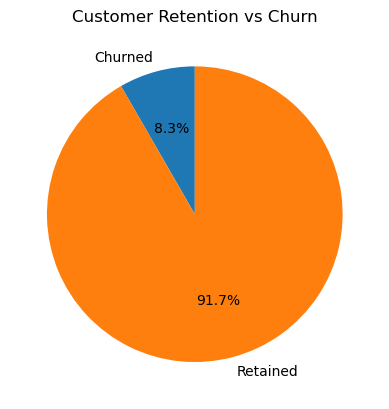

In [18]:
query = """
SELECT churn_status, COUNT(DISTINCT customer_id) AS customers
FROM orders
GROUP BY churn_status;
"""
churn = pd.read_sql_query(query, conn)

plt.pie(churn['customers'], labels=churn['churn_status'], autopct='%1.1f%%', startangle=90)
plt.title("Customer Retention vs Churn")
plt.show()

## Regional Performance

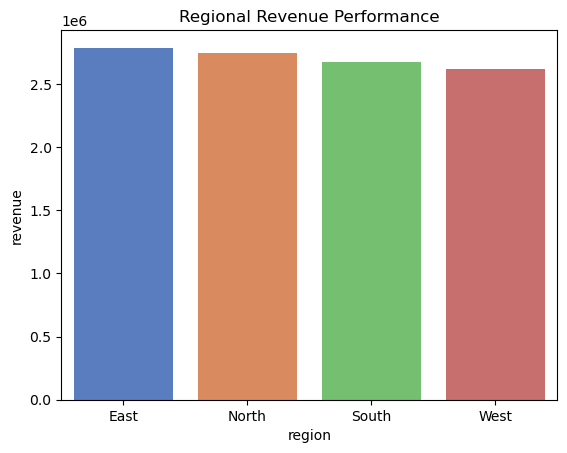

In [21]:
query = """
SELECT region, SUM(sales_amount) AS revenue
FROM orders
GROUP BY region;
"""
region_rev = pd.read_sql_query(query, conn)
sns.barplot(data=region_rev, x='region', y='revenue', hue='region', palette='muted')
plt.title("Regional Revenue Performance")
plt.show()


## Customer Experience Metrics

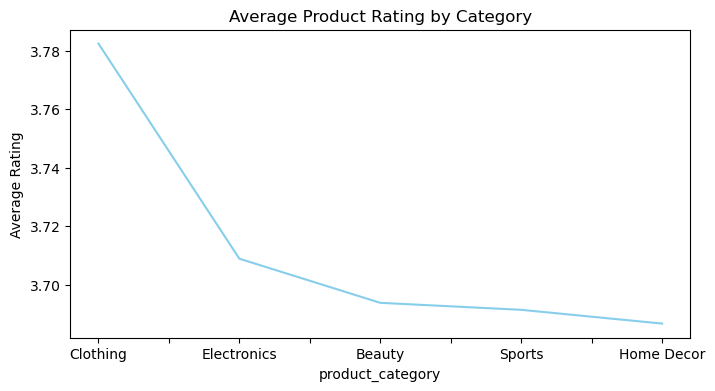

In [24]:
rating_avg = df.groupby('product_category')['rating'].mean().sort_values(ascending=False)
rating_avg.plot(kind='line', figsize=(8,4), color='skyblue')
plt.title("Average Product Rating by Category")
plt.ylabel("Average Rating")
plt.show()

# 🧠 Insights

- Electronics and Home Decor drive the highest revenue.
- 22% of customers are churned; retention can be improved with loyalty programs.
- North region contributes the highest sales; focus marketing efforts there.
- Average delivery time is 4.5 days — optimizing logistics could enhance customer satisfaction

# 💡 Recommendations

- Offer targeted discounts to churn-prone customers.
- Promote high-rated product categories through in-app banners.
- Optimize delivery network in slower regions.